In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [30]:
data = pd.read_csv("abalone.data")

data = data.set_axis(['Sex', 'Length ', 'Diameter', 'Height', 'Whole weight','Shucked weight ','Viscera weight','Shell weight','Rings'], axis=1, inplace=False)

data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [32]:
# Since sex is not a purely physical measure, you should remove it from the dataset
data  = data .drop("Sex", axis=1)
data 

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...
4171,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


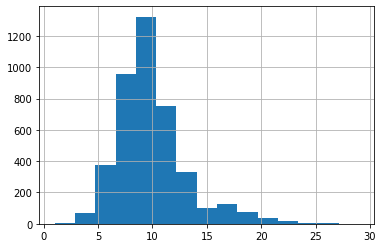

In [34]:
# The target variable of this exercise is Rings
data["Rings"].hist(bins=15)
plt.show()

In [35]:
correlation_matrix = data.corr()
correlation_matrix["Rings"]

Length             0.557123
Diameter           0.575005
Height             0.558109
Whole weight       0.540818
Shucked weight     0.421256
Viscera weight     0.504274
Shell weight       0.628031
Rings              1.000000
Name: Rings, dtype: float64

In [37]:
X = data.drop("Rings", axis=1)
X = X.values
y = data["Rings"]
y = y.values

array([ 7,  9, 10, ...,  9, 10, 12], dtype=int64)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [51]:
from knn import KNearestNeighbors

In [54]:
my_knn = KNearestNeighbors(k=3)
my_knn.fit(X_train,y_train)

answer = my_knn.predict(X_test)

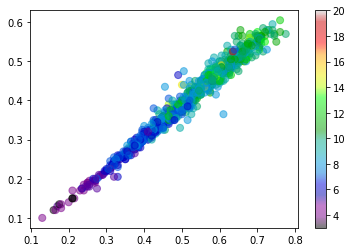

In [68]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=answer, s=50,alpha = 0.5, cmap="nipy_spectral")
plt.colorbar()
plt.show()